In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, GRU, SimpleRNN, Conv1D, TimeDistributed, MaxPooling1D, Flatten, Dropout
from keras import optimizers,metrics
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [63]:
from IPython.display import clear_output

In [64]:
import pandas as pd
import numpy as np

In [143]:
df = pd.read_csv("../augmented-ecom-churn-data.csv", index_col="visitorid")

In [144]:
df.head()

,Unnamed: 0,ses_rec,ses_rec_avg,ses_rec_sd,user_rec,int_n_r,tran_n_r,rev_sum_r,major_spend_r,int_itm_n_avg,ses_mo_avg,ses_mo_sd,ses_ho_avg,ses_ho_sd,ses_wknd_r,ses_len_avg,time_to_int,target_class
visitorid,,,,,,,,,,,,,,,,,,
64931,0,2.0,2.000000,3.807887,98.0,4.000000,0.121951,4423.9023,0.024390,2.487805,5.853659,1.062096,15.292683,4.290943,0.390244,7.451220,1.862805,0
72373,1,13.0,8.000000,0.000000,21.0,3.500000,0.500000,9300.0000,0.500000,1.500000,7.500000,0.707107,18.500000,2.121320,0.500000,17.175000,4.907143,0
150651,2,8.0,9.444445,11.596083,97.0,5.700000,0.800000,14976.0000,0.100000,3.300000,5.900000,1.100505,19.900000,1.523884,0.200000,7.818333,1.371638,0
500130,3,12.0,6.000000,6.164414,36.0,5.600000,0.800000,17160.0000,0.200000,4.400000,7.400000,0.547723,12.400000,8.848729,0.600000,3.943333,0.704167,0
543762,4,1.0,1.250000,2.046338,15.0,3.888889,0.222222,17733.3340,0.111111,2.000000,8.000000,0.000000,17.888890,3.179797,0.333333,8.664815,2.228095,0


In [145]:
df.shape

(108810, 18)

In [146]:
df.columns

Index(['Unnamed: 0', 'ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'user_rec',
       'int_n_r', 'tran_n_r', 'rev_sum_r', 'major_spend_r', 'int_itm_n_avg',
       'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd', 'ses_wknd_r',
       'ses_len_avg', 'time_to_int', 'target_class'],
      dtype='object')

In [69]:
df.head()

,Unnamed: 0,ses_rec,ses_rec_avg,ses_rec_sd,user_rec,int_n_r,tran_n_r,rev_sum_r,major_spend_r,int_itm_n_avg,ses_mo_avg,ses_mo_sd,ses_ho_avg,ses_ho_sd,ses_wknd_r,ses_len_avg,time_to_int,target_class
visitorid,,,,,,,,,,,,,,,,,,
64931,0,2.0,2.000000,3.807887,98.0,4.000000,0.121951,4423.9023,0.024390,2.487805,5.853659,1.062096,15.292683,4.290943,0.390244,7.451220,1.862805,0
72373,1,13.0,8.000000,0.000000,21.0,3.500000,0.500000,9300.0000,0.500000,1.500000,7.500000,0.707107,18.500000,2.121320,0.500000,17.175000,4.907143,0
150651,2,8.0,9.444445,11.596083,97.0,5.700000,0.800000,14976.0000,0.100000,3.300000,5.900000,1.100505,19.900000,1.523884,0.200000,7.818333,1.371638,0
500130,3,12.0,6.000000,6.164414,36.0,5.600000,0.800000,17160.0000,0.200000,4.400000,7.400000,0.547723,12.400000,8.848729,0.600000,3.943333,0.704167,0
543762,4,1.0,1.250000,2.046338,15.0,3.888889,0.222222,17733.3340,0.111111,2.000000,8.000000,0.000000,17.888890,3.179797,0.333333,8.664815,2.228095,0


In [133]:
from sklearn import preprocessing

cols = ['ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'user_rec',
       'int_n_r', 'tran_n_r','rev_sum_r', 'major_spend_r', 'int_itm_n_avg',
       'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd', 'ses_wknd_r',
       'ses_len_avg', 'time_to_int']


min_max_scaler = preprocessing.MinMaxScaler()
df[cols] = min_max_scaler.fit_transform(df[cols])

In [134]:
df

,Unnamed: 0,ses_rec,ses_rec_avg,ses_rec_sd,user_rec,int_n_r,tran_n_r,rev_sum_r,major_spend_r,int_itm_n_avg,ses_mo_avg,ses_mo_sd,ses_ho_avg,ses_ho_sd,ses_wknd_r,ses_len_avg,time_to_int,target_class
visitorid,,,,,,,,,,,,,,,,,,
64931,0,0.054054,0.016338,0.069367,0.867257,0.067658,0.024390,0.002787,0.024390,0.044245,0.267661,0.360921,0.609747,0.198924,0.337223,0.094121,0.214939,0
72373,1,0.351351,0.065353,0.000000,0.185841,0.059182,0.100000,0.005858,0.500000,0.026603,0.803928,0.240289,0.737629,0.098342,0.432067,0.216947,0.566209,0
150651,2,0.216216,0.077153,0.211242,0.858407,0.096476,0.160000,0.009434,0.100000,0.058751,0.282756,0.373973,0.793450,0.070646,0.172827,0.098758,0.158266,0
500130,3,0.324324,0.049015,0.112295,0.318584,0.094781,0.160000,0.010810,0.200000,0.078398,0.771355,0.186127,0.494411,0.410218,0.518481,0.049811,0.081250,0
543762,4,0.027027,0.010211,0.037277,0.132743,0.065774,0.044444,0.011171,0.111111,0.035533,0.966794,0.000000,0.713263,0.147412,0.288045,0.109450,0.257088,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406824,108805,0.378378,0.596350,0.000000,0.769912,0.016803,0.000000,0.000000,0.000000,0.017672,0.478196,0.720866,0.418654,0.098342,0.000000,0.000000,0.000000,1
1406906,108806,0.513514,0.106199,0.000000,0.283186,0.033755,0.000000,0.000000,0.000000,0.026603,0.641062,0.000000,0.478462,0.262246,0.000000,0.050737,0.231731,1
1406914,108807,0.567568,0.005446,0.017175,0.203540,0.059182,0.000000,0.000000,0.000000,0.053393,0.641062,0.000000,0.528302,0.121922,0.648101,0.080368,0.209753,1


In [72]:
thresh = int(len(df) * .8)

train_x, train_y = df[cols].iloc[:thresh].to_numpy(), df["target_class"].iloc[:thresh].to_numpy()


val_x, val_y = df[cols].iloc[thresh:].to_numpy(), df["target_class"].iloc[thresh:].to_numpy()

In [113]:
list(df.columns)

['Unnamed: 0',
 'ses_rec',
 'ses_rec_avg',
 'ses_rec_sd',
 'user_rec',
 'int_n_r',
 'tran_n_r',
 'rev_sum_r',
 'major_spend_r',
 'int_itm_n_avg',
 'ses_mo_avg',
 'ses_mo_sd',
 'ses_ho_avg',
 'ses_ho_sd',
 'ses_wknd_r',
 'ses_len_avg',
 'time_to_int',
 'target_class']

In [74]:
train_x = train_x.reshape((-1, 16, 1))

val_x = val_x.reshape((-1, 16, 1))

In [75]:
def init_model():
    model = Sequential()
    model.add(Conv1D(filters=8, kernel_size=2, activation='relu', padding='same', input_shape=(16, 1)))

    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(70))
    model.add(Dense(1, activation='sigmoid'))

    adam = optimizers.Adam(learning_rate=0.001)

    model.compile(optimizer=adam,
                  loss='binary_crossentropy',
                  metrics=[metrics.Precision(),'accuracy'])
    return model

model = init_model()

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 16, 8)             24        
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 8, 8)              0         
 g1D)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 70)                22120     
                                                                 
 dense_3 (Dense)             (None, 1)                 71        
                                                                 
Total params: 22215 (86.78 KB)
Trainable params: 22215 (86.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


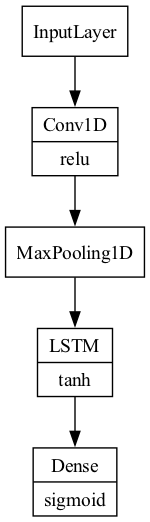

In [107]:
import keras
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
    show_layer_activations=True,
    show_trainable=False,
)

In [77]:
class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "train_loss")
            plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.val_losses, label = "val_loss")
            plt.plot(N, self.val_acc, label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

plot_losses = TrainingPlot()

/var/folders/3h/p1ryrhcs5gb6mc922xgnfkmr0000gn/T/ipykernel_85173/2175184423.py:31: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


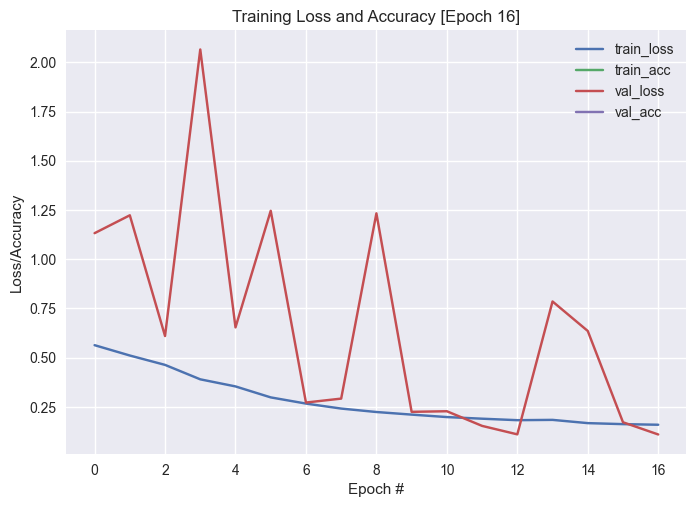

171/171 [==============================] - 3s 18ms/step - loss: 0.1596 - precision_3: 0.8610 - accuracy: 0.9335 - val_loss: 0.1102 - val_precision_3: 1.0000 - val_accuracy: 0.9728


In [78]:
history = model.fit(train_x, train_y, epochs = 17, validation_data = (val_x, val_y),
                    batch_size = 512, callbacks=[plot_losses])

In [97]:
list(history.history)

['loss',
 'precision_3',
 'accuracy',
 'val_loss',
 'val_precision_3',
 'val_accuracy']

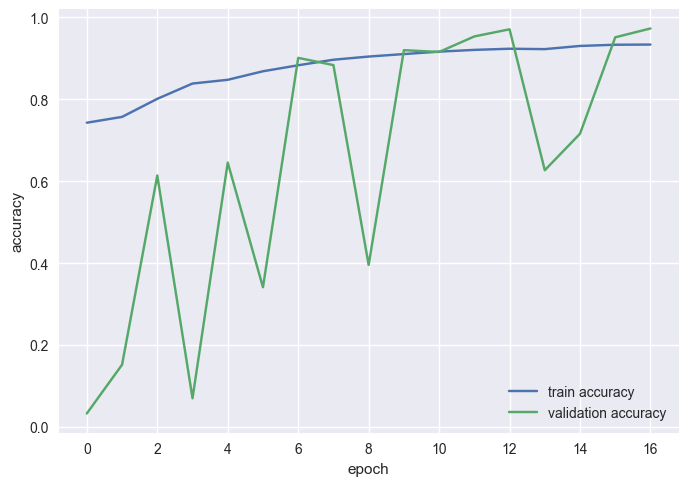

In [106]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend(loc="lower right")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [79]:
acc = model.evaluate(val_x,val_y)

681/681 [==============================] - 1s 1ms/step - loss: 0.1102 - precision_3: 1.0000 - accuracy: 0.9728


In [110]:
acc

[0.11019407212734222, 1.0, 0.972796618938446]

## Testing other sklearn models



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.75`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.75`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.75`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.75`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.75`, but please see the docs fo

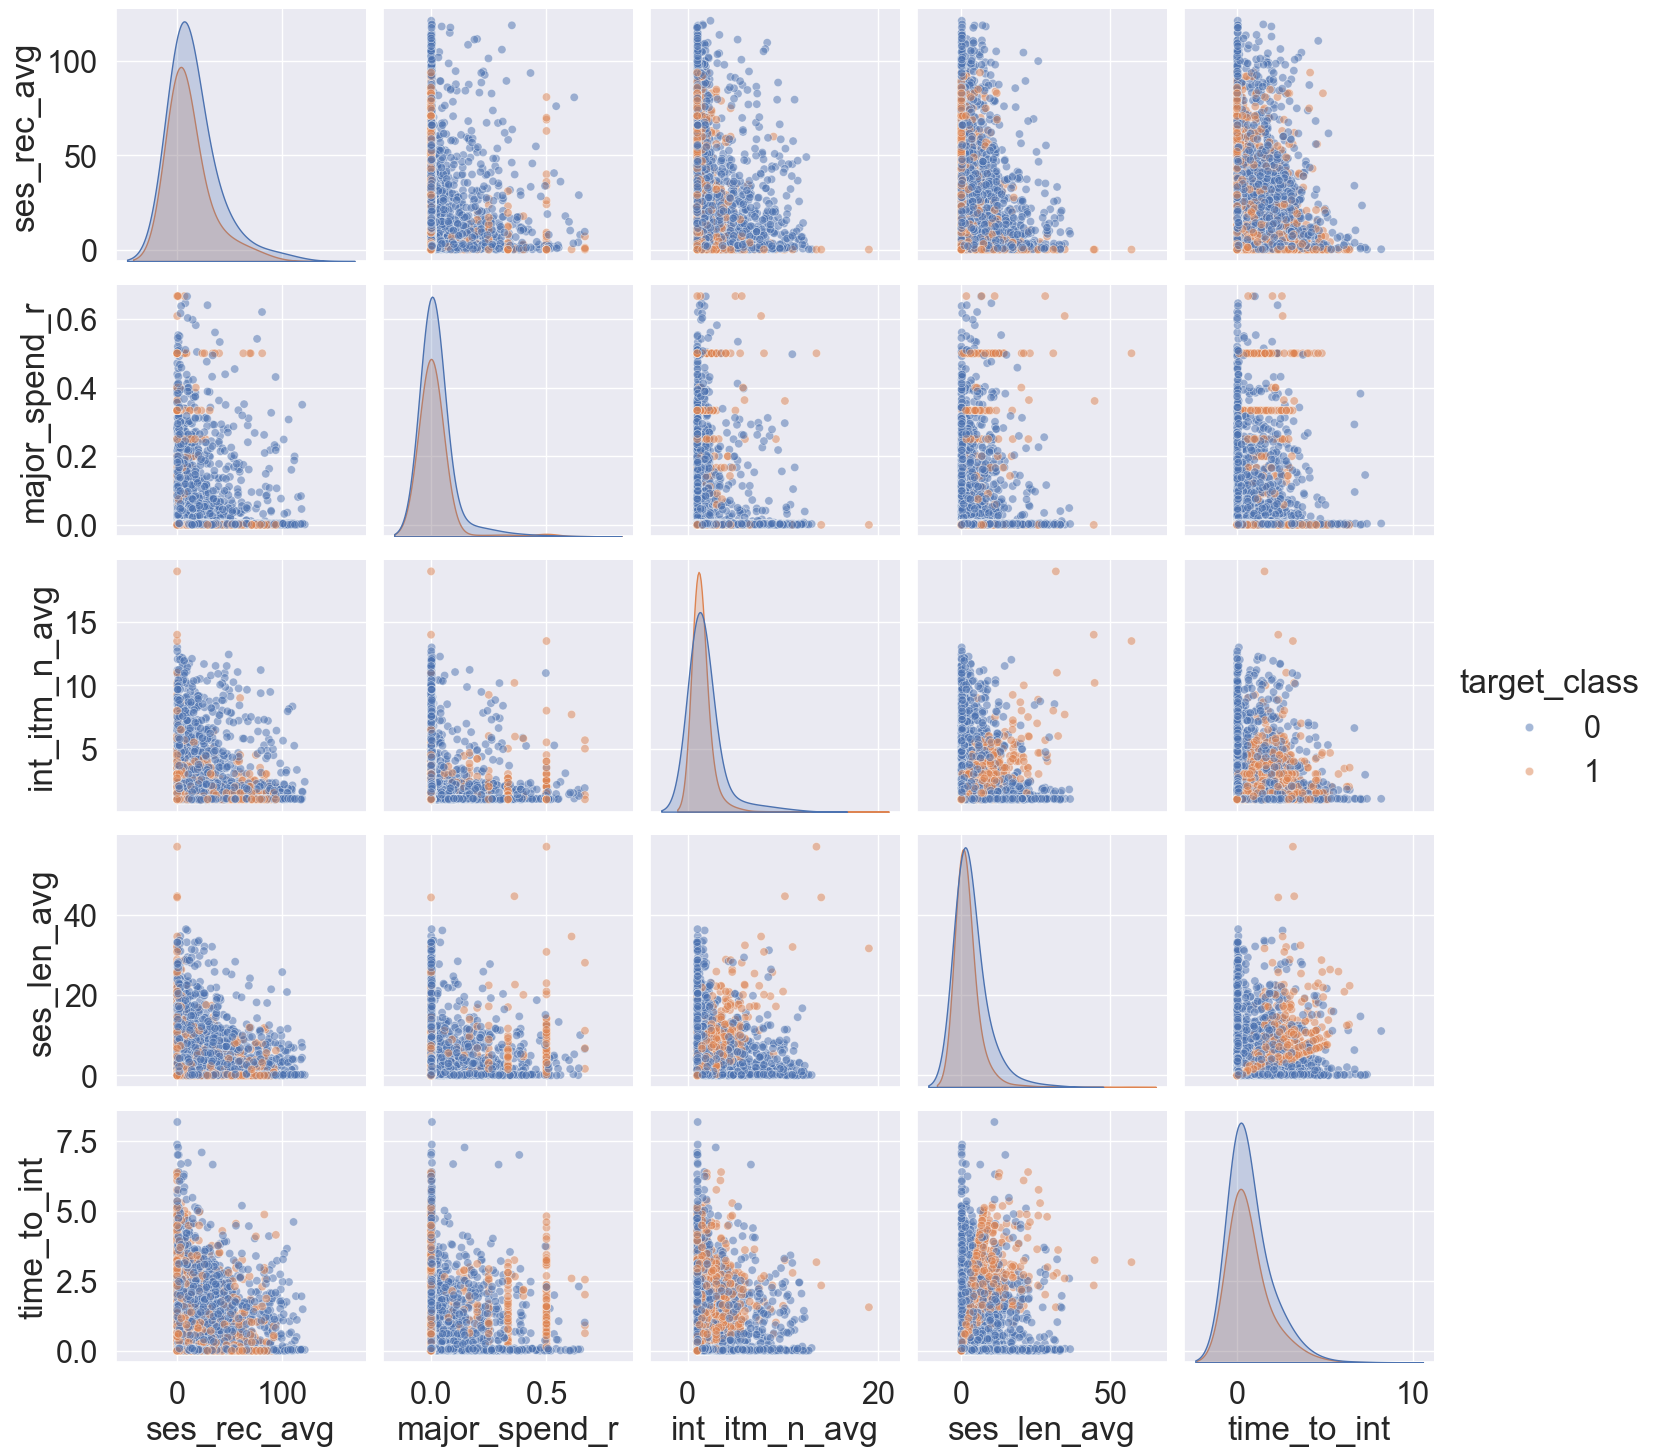

In [212]:
import seaborn as sns
classification_data = df
sns.set(font_scale=2) 
sns.pairplot(classification_data.sample(frac=.1, random_state=20200821),
    hue="target_class", vars= ['ses_rec_avg',  'major_spend_r', 'int_itm_n_avg',
       'ses_len_avg', 'time_to_int'],
    diag_kws=dict(bw=0.75), plot_kws=dict(alpha=0.5), height=3, aspect=1)
plt.show();   

In [186]:
import numpy as np, os
import pandas as pd


# https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/274717 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from keras.optimizers.schedules import ExponentialDecay

from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import RobustScaler, normalize
from sklearn.model_selection import train_test_split, GroupKFold, KFold

from IPython.display import display

DEBUG = False
TRAIN_MODEL = False
INFER_TEST = True
ONE_FOLD_ONLY = True
COMPUTE_LSTM_IMPORTANCE = True

In [194]:
train = df[cols]
test = df[cols].iloc[thresh:]

In [195]:
train

,ses_rec,ses_rec_avg,ses_rec_sd,user_rec,int_n_r,tran_n_r,rev_sum_r,major_spend_r,int_itm_n_avg,ses_mo_avg,ses_mo_sd,ses_ho_avg,ses_ho_sd,ses_wknd_r,ses_len_avg,time_to_int
visitorid,,,,,,,,,,,,,,,,
64931,2.0,2.000000,3.807887,98.0,4.000000,0.121951,4423.9023,0.024390,2.487805,5.853659,1.062096,15.292683,4.290943,0.390244,7.451220,1.862805
72373,13.0,8.000000,0.000000,21.0,3.500000,0.500000,9300.0000,0.500000,1.500000,7.500000,0.707107,18.500000,2.121320,0.500000,17.175000,4.907143
150651,8.0,9.444445,11.596083,97.0,5.700000,0.800000,14976.0000,0.100000,3.300000,5.900000,1.100505,19.900000,1.523884,0.200000,7.818333,1.371638
500130,12.0,6.000000,6.164414,36.0,5.600000,0.800000,17160.0000,0.200000,4.400000,7.400000,0.547723,12.400000,8.848729,0.600000,3.943333,0.704167
543762,1.0,1.250000,2.046338,15.0,3.888889,0.222222,17733.3340,0.111111,2.000000,8.000000,0.000000,17.888890,3.179797,0.333333,8.664815,2.228095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406824,14.0,73.000000,0.000000,87.0,1.000000,0.000000,0.0000,0.000000,1.000000,6.500000,2.121320,10.500000,2.121320,0.000000,0.000000,0.000000
1406906,19.0,13.000000,0.000000,32.0,2.000000,0.000000,0.0000,0.000000,1.500000,7.000000,0.000000,12.000000,5.656854,0.000000,4.016667,2.008333
1406914,21.0,0.666667,0.942809,23.0,3.500000,0.000000,0.0000,0.000000,3.000000,7.000000,0.000000,13.250000,2.629955,0.750000,6.362500,1.817857


In [196]:
test

,ses_rec,ses_rec_avg,ses_rec_sd,user_rec,int_n_r,tran_n_r,rev_sum_r,major_spend_r,int_itm_n_avg,ses_mo_avg,ses_mo_sd,ses_ho_avg,ses_ho_sd,ses_wknd_r,ses_len_avg,time_to_int
visitorid,,,,,,,,,,,,,,,,
8717,27.0,6.500000,6.500000,41.0,1.00,0.0,0.0,0.0,1.000000,7.000000,0.000000,16.666666,3.214550,0.000000,0.000000,0.000000
8815,15.0,0.333333,0.471405,18.0,1.75,0.0,0.0,0.0,1.000000,7.500000,0.577350,16.250000,4.031129,0.500000,0.425000,0.242857
9188,5.0,3.400000,5.351636,23.0,2.00,0.0,0.0,0.0,1.833333,7.166666,0.408248,14.666667,5.163978,0.166667,1.952778,0.976389
9274,7.0,10.000000,0.000000,17.0,1.00,0.0,0.0,0.0,1.000000,7.500000,0.707107,16.000000,8.485281,0.000000,0.000000,0.000000
9521,13.0,23.333334,32.293790,84.0,1.00,0.0,0.0,0.0,1.000000,5.750000,1.500000,10.000000,2.943920,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406824,14.0,73.000000,0.000000,87.0,1.00,0.0,0.0,0.0,1.000000,6.500000,2.121320,10.500000,2.121320,0.000000,0.000000,0.000000
1406906,19.0,13.000000,0.000000,32.0,2.00,0.0,0.0,0.0,1.500000,7.000000,0.000000,12.000000,5.656854,0.000000,4.016667,2.008333
1406914,21.0,0.666667,0.942809,23.0,3.50,0.0,0.0,0.0,3.000000,7.000000,0.000000,13.250000,2.629955,0.750000,6.362500,1.817857


In [204]:
targets = df[['target_class']].to_numpy()

COLS = list(train.columns)
print('Number of feature columns =', len(COLS) )


Number of feature columns = 16


In [205]:
targets.shape

(108810, 1)

In [206]:
train.shape

(108810, 16)

In [207]:
test.shape

(21762, 16)

In [208]:
EPOCH = 300
BATCH_SIZE = 1024
NUM_FOLDS = 10

# detect and init the TPU
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# GET GPU STRATEGY
gpu_strategy = tf.distribute.get_strategy()

with gpu_strategy.scope():
    kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=2021)
    test_preds = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(train, targets)):
        K.clear_session()
        
        print('-'*15, '>', f'Fold {fold+1}', '<', '-'*15)
        X_train, X_valid = train[train_idx], train[test_idx]
        y_train, y_valid = targets[train_idx], targets[test_idx]
                    
        if COMPUTE_LSTM_IMPORTANCE:
            results = []
            print(' Computing LSTM feature importance...')
            
            # COMPUTE BASELINE (NO SHUFFLE)
            oof_preds = model.predict(X_valid, verbose=0).squeeze() 
            baseline_mae = np.mean(np.abs( oof_preds-y_valid ))
            results.append({'feature':'BASELINE','mae':baseline_mae})           

            for k in tqdm(range(len(COLS))):
                
                # SHUFFLE FEATURE K
                save_col = X_valid[:,:,k].copy()
                np.random.shuffle(X_valid[:,:,k])
                        
                # COMPUTE OOF MAE WITH FEATURE K SHUFFLED
                oof_preds = model.predict(X_valid, verbose=0).squeeze() 
                mae = np.mean(np.abs( oof_preds-y_valid ))
                results.append({'feature':COLS[k],'mae':mae})
                X_valid[:,:,k] = save_col
         
            # DISPLAY LSTM FEATURE IMPORTANCE
            print()
            df = pd.DataFrame(results)
            df = df.sort_values('mae')
            plt.figure(figsize=(10,20))
            plt.barh(np.arange(len(COLS)+1),df.mae)
            plt.yticks(np.arange(len(COLS)+1),df.feature.values)
            plt.title('LSTM Feature Importance',size=16)
            plt.ylim((-1,len(COLS)+1))
            plt.plot([baseline_mae,baseline_mae],[-1,len(COLS)+1], '--', color='orange',
                     label=f'Baseline OOF\nMAE={baseline_mae:.3f}')
            plt.xlabel(f'Fold {fold+1} OOF MAE with feature permuted',size=14)
            plt.ylabel('Feature',size=14)
            plt.legend()
            plt.show()
                               
            # SAVE LSTM FEATURE IMPORTANCE
            df = df.sort_values('mae',ascending=False)
            df.to_csv(f'lstm_feature_importance_fold_{fold+1}.csv',index=False)
                               
        # ONLY DO ONE FOLD
        if ONE_FOLD_ONLY: break

--------------- > Fold 1 < ---------------


KeyError: "None of [Index([     0,      1,      4,      5,      6,      7,      8,     10,     11,\n           12,\n       ...\n       108800, 108801, 108802, 108803, 108804, 108805, 108806, 108807, 108808,\n       108809],\n      dtype='int64', length=97929)] are in the [columns]"